<a href="https://colab.research.google.com/github/PRIMA-LAB-IPU/Lecture/blob/main/license-plate/tesseract_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tesseract本体とPythonラッパーをインストールします（Install Tesseract and its python wrapper）

In [1]:
!sudo apt-get purge tesseract-ocr libtesseract-dev tesseract-ocr-jpn
!sudo apt-get install tesseract-ocr libtesseract-dev tesseract-ocr-jpn
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'libtesseract-dev' is not installed, so not removed
Package 'tesseract-ocr' is not installed, so not removed
Package 'tesseract-ocr-jpn' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-jpn tesseract-ocr-osd
0 upgraded, 7 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,949 kB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.3 [581 

# URLから画像を入手 (Get an image from a url)
Note: In order to read an image from the github, you need to modify the url.

[Original URL] https://github.com/PRIMA-LAB-IPU/Lecture/blob/019e2faa85a6ddd3858eafca94b6d9cf136de3b4/license-plate/car.jpg (It's not working)

[Modified URL] https://raw.githubusercontent.com/PRIMA-LAB-IPU/Lecture/019e2faa85a6ddd3858eafca94b6d9cf136de3b4/license-plate/car.jpg

In [136]:
import urllib.request
url = 'https://raw.githubusercontent.com/PRIMA-LAB-IPU/Lecture/019e2faa85a6ddd3858eafca94b6d9cf136de3b4/license-plate/car.jpg'
# url = 'https://raw.githubusercontent.com/PRIMA-LAB-IPU/Lecture/5599067a1c107aee6464854e409e1186d3bc9165/license-plate/other-car.jpg'

# False recognition on below picture
# url = 'https://raw.githubusercontent.com/PRIMA-LAB-IPU/Lecture/558dae4bf1d1525c66b3b73c9d4d06781848faf7/license-plate/car-sport.jpeg'

file_name = 'car.jpg'
urllib.request.urlretrieve(url, file_name)

('car.jpg', <http.client.HTTPMessage at 0x7aec6d73d690>)

# ライブラリの呼び出し（Import libraries）

In [137]:
# パッケージをインポート
import numpy as np
import cv2
import  imutils
import sys
import pytesseract
from pytesseract import Output
import time
import matplotlib.pyplot as plt

# 画像表示関数（Display function）

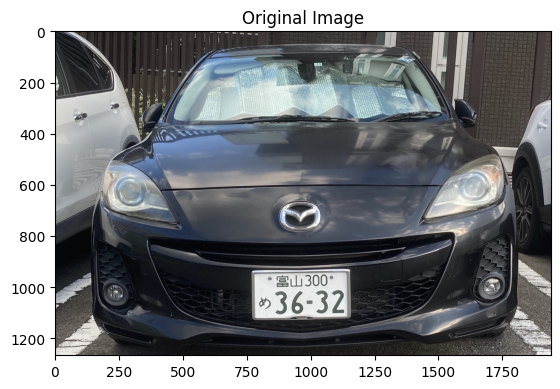

In [138]:
# 画像表示用
def plt_imshow(title, image):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

 # 画像読み込みして表示
image = cv2.imread(file_name)
plt_imshow("Original Image", image)

# ナンバープレート領域の同定（Find the license plate region using contour detection）

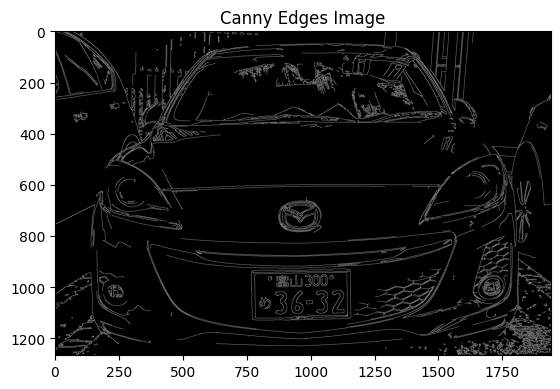

In [139]:
# Cannyエッジ検出
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)
plt_imshow("Canny Edges Image", edged)

# 輪郭検出
contours = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:30]

In [140]:
# 取得した輪郭から形状の近似を行い長方形を探す
number_contours = None
for c in contours:
  perimeter = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.02 * perimeter, True)
  if len(approx) == 4:
      number_contours = approx
      break

print(number_contours)

[[[1151  934]]

 [[ 772  937]]

 [[ 770 1123]]

 [[1147 1123]]]


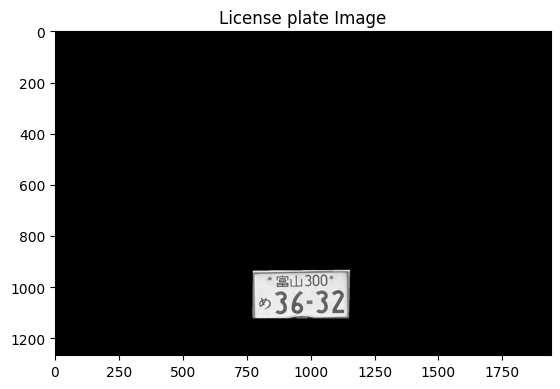

| "富3007 |
536-32|



In [141]:
# ナンバープレート以外はマスクする
if number_contours is not None:
  mask = np.zeros(gray.shape,dtype="uint8")
  image_plate = cv2.drawContours(mask,[number_contours],0,255,-1)
  image_plate = cv2.bitwise_and(gray,gray,mask=mask)
  plt_imshow("License plate Image",image_plate)

# ナンバープレート画像からテキスト検出
# config = ('-l jpn --oem 3 --psm 6 -c tessedit_char_whitelist="0123456789-あいうえおかきくけこさしすせそたちつてとなにぬねのはひふへほまみむめもやゆよらりるれろわをん" ')
config = ('-l jpn --oem 3 --psm 6  ')
text = pytesseract.image_to_string(image_plate, config=config)

if text:
  print(text)
else:
  print("Could not read license plate.")